# PCA Dimensionality Reduction Algorithum

@uthor

## Steps

1. Normalize the data.
2. Calculate the eigenvalues and eigenvectors of the covariance matrix or corelation matrix or use SVD.
3. Sort all eigenvalues and chose the k eigenvectors that are correspond to the k largest eigenvalues. Here k is the number of dimention of the new feature subspace.
4. Construct the projection metrix W from the selected k eigen vectors.
5. Transform the original dataset X using W to obtain k dimensional new feature subspace Y.

## Import Libraries

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import numpy as np
import math

## Loading the Dataset

In [ ]:
data_frame = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
    header=None,
    sep=',')

data_frame.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
data_frame.dropna(how="all", inplace=True) # drops the empty line at file-end

data_frame.head()

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# split data table into data X and class labels y

X = data_frame.iloc[:,0:4].values
Y = data_frame.iloc[:,4].values

## Visualization of data in four features

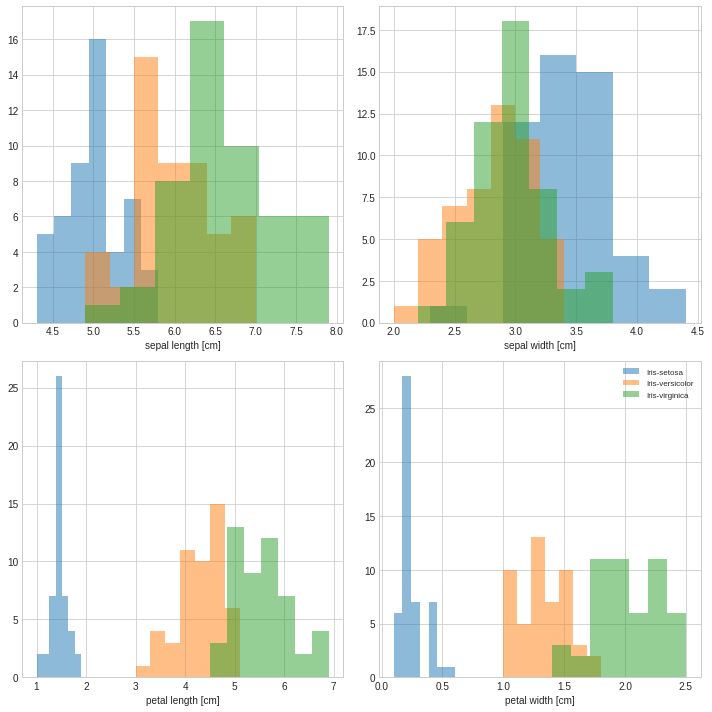

In [ ]:
feature_dict = {0: 'sepal length [cm]',
                1: 'sepal width [cm]',
                2: 'petal length [cm]',
                3: 'petal width [cm]'}

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(10,10))
    for cnt in range(4):
        plt.subplot(2, 2, cnt+1)
        for lab in ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'):
            plt.hist(X[Y==lab, cnt],label=lab, bins=7, alpha=0.5,)
        plt.xlabel(feature_dict[cnt])
    plt.legend(loc='upper right', fancybox=True, fontsize=8)

    plt.tight_layout()
    plt.show()

## Standardization

In [ ]:
#standardizing data (mean = 0 , variance=1)

X_std = StandardScaler().fit_transform(X)

## Covariance matrix or Correlation matrix

In [ ]:
#construct covariance matrix using formula

mean_vec = np.mean(X_std, axis=0)
cov_mat1 = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat1)

Covariance matrix 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [ ]:
#construct covariance matrix using numpy

cov_mat = np.cov(X_std.T)
cov_mat

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

In [ ]:
#construct correlation matrix of standardized data using numpy

cor_mat1 = np.corrcoef(X_std.T)
cor_mat1

array([[ 1.        , -0.10936925,  0.87175416,  0.81795363],
       [-0.10936925,  1.        , -0.4205161 , -0.35654409],
       [ 0.87175416, -0.4205161 ,  1.        ,  0.9627571 ],
       [ 0.81795363, -0.35654409,  0.9627571 ,  1.        ]])

In [ ]:
#construct correlation matrix of real data using numpy

cor_mat1 = np.corrcoef(X.T)
cor_mat1

array([[ 1.        , -0.10936925,  0.87175416,  0.81795363],
       [-0.10936925,  1.        , -0.4205161 , -0.35654409],
       [ 0.87175416, -0.4205161 ,  1.        ,  0.9627571 ],
       [ 0.81795363, -0.35654409,  0.9627571 ,  1.        ]])

## Eigenvalues and Eigenvectors

In [ ]:
#Eigenvalues and Eigenvectors of covariance matrix

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[2.93035378 0.92740362 0.14834223 0.02074601]


In [ ]:
#Eigenvalues and Eigenvectors of correlation matrix


eig_vals, eig_vecs = np.linalg.eig(cor_mat1)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[2.91081808 0.92122093 0.14735328 0.02060771]


In [ ]:
#SVD on standardized data

u,s,v = np.linalg.svd(X_std.T)
u

array([[-0.52237162, -0.37231836,  0.72101681,  0.26199559],
       [ 0.26335492, -0.92555649, -0.24203288, -0.12413481],
       [-0.58125401, -0.02109478, -0.14089226, -0.80115427],
       [-0.56561105, -0.06541577, -0.6338014 ,  0.52354627]])

## Sorting pairs based on eigenvalues

In [ ]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.9108180837520528
0.9212209307072254
0.1473532783050958
0.020607707235624842


## Variance

In [ ]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

print('individual explained variance \n%s' %var_exp)
print('\ncumulative explained variance \n%s' %cum_var_exp)

individual explained variance 
[72.77045209380134, 23.030523267680643, 3.683831957627396, 0.5151926808906212]

cumulative explained variance 
[ 72.77045209  95.80097536  99.48480732 100.        ]


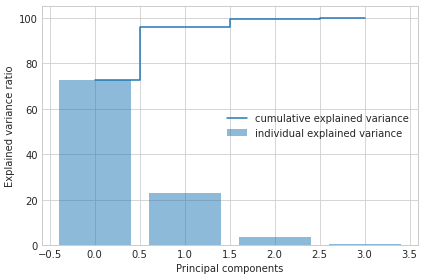

In [ ]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(4), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(4), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

## Projection Matrix

In [ ]:
#take first two eigenvector

new_axes = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))

print('new_axes:\n', new_axes)

new_axes:
 [[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


In [ ]:
#take all eigenvector

new_axes_max = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1),
                      eig_pairs[2][1].reshape(4,1),
                      eig_pairs[3][1].reshape(4,1)))

## Projection Onto the New Feature Space

In [ ]:
#projection on reduced dimention(first two PCs) 

X_proj = X_std.dot(new_axes)

In [ ]:
#projection on all PCs

X_proj_max = X_std.dot(new_axes_max)

## Covariance matrix of Projected data

In [ ]:
# Covariance matrix of Projected data is almost diagonal matrix

X_proj_cov_mat = np.cov(X_proj.T)
np.around(X_proj_cov_mat)

array([[ 3., -0.],
       [-0.,  1.]])

In [ ]:
X_proj_cov_mat = np.cov(X_proj_max.T)
np.around(X_proj_cov_mat)

array([[ 3., -0.,  0.,  0.],
       [-0.,  1.,  0.,  0.],
       [ 0.,  0.,  0., -0.],
       [ 0.,  0., -0.,  0.]])

## Visualize new dataset in 2d

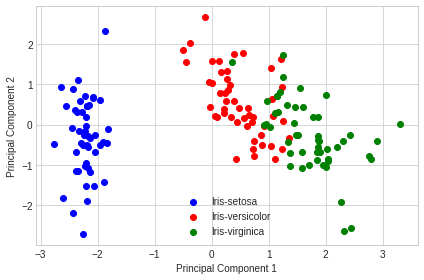

In [ ]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'red', 'green')):
        plt.scatter(X_proj[Y==lab, 0],
                    X_proj[Y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

## PCA using sklearn

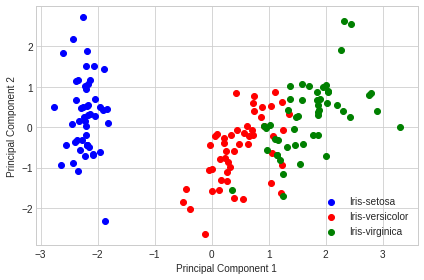

In [ ]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'red', 'green')):
        plt.scatter(Y_sklearn[Y==lab, 0],
                    Y_sklearn[Y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.tight_layout()
    plt.show()